In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('pitch_stats_011322.csv', index_col=0)


#documentation is here https://baseballsavant.mlb.com/csv-docs

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)




,first_name,player_id,year,player_age,p_home_run,p_k_percent,p_bb_percent,batting_avg,p_total_strike,n_ff_formatted,ff_avg_speed,n_sl_formatted,sl_avg_speed,n_ch_formatted,ch_avg_speed,n_cukc_formatted,cu_avg_speed,si_avg_speed,si_avg_spin,n_fc_formatted,fc_avg_speed,n_fs_formatted,fs_avg_speed,n_kn_formatted,kn_avg_speed,n_fastball_formatted,fastball_avg_speed,n_breaking_formatted,breaking_avg_speed,Unnamed: 30
last_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Wainwright,Adam,425794,2022,40,16,17.8,6.7,0.261,2024,9.4,88.0,NaN,NaN,6.1,82.2,31.0,72.9,88.6,2201.0,25.4,84.3,NaN,NaN,NaN,NaN,62.9,86.8,31.0,72.9,NaN
Verlander,Justin,434378,2022,39,12,27.8,4.4,0.186,1787,50.4,95.0,28.3,87.4,2.4,86.2,18.8,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.4,95.0,47.1,84.1,NaN
Kluber,Corey,446372,2022,36,20,20.2,3.0,0.274,1706,1.5,88.9,NaN,NaN,10.3,82.9,27.3,80.7,88.9,2075.0,34.2,86.3,NaN,NaN,NaN,NaN,62.4,87.5,27.3,80.7,NaN
Morton,Charlie,450203,2022,38,28,28.2,8.7,0.233,1854,33.3,94.9,NaN,NaN,8.6,87.2,38.0,81.3,94.7,2192.0,9.3,88.4,NaN,NaN,NaN,NaN,53.4,93.7,38.0,81.3,NaN
Quintana,Jose,500779,2022,33,8,20.2,6.9,0.246,1705,36.0,91.2,NaN,NaN,19.5,86.4,28.1,78.4,91.4,2070.0,NaN,NaN,NaN,NaN,NaN,NaN,52.4,91.3,28.1,78.4,NaN
Gibson,Kyle,502043,2022,34,24,20.1,6.7,0.268,1747,11.9,92.0,21.0,83.3,10.7,84.6,6.6,79.0,91.6,2133.0,21.7,89.4,NaN,NaN,NaN,NaN,61.7,90.9,27.6,82.3,NaN
Darvish,Yu,506433,2022,35,22,25.6,4.8,0.207,2016,25.2,95.0,19.1,82.3,NaN,NaN,4.0,72.7,94.7,2275.0,35.2,86.5,7.5,89.2,NaN,NaN,69.5,90.7,23.1,80.6,NaN
Kelly,Merrill,518876,2022,33,21,22.0,7.6,0.226,2011,29.2,92.6,0.2,85.0,21.8,88.6,13.5,82.2,92.6,2206.0,18.3,90.9,NaN,NaN,NaN,NaN,64.5,92.1,13.7,82.2,NaN
Perez,Martin,527048,2022,31,11,20.6,8.4,0.241,1885,8.0,92.7,1.4,84.4,27.6,84.4,3.5,78.8,92.6,1997.0,24.3,89.8,NaN,NaN,NaN,NaN,67.5,91.6,4.9,80.4,NaN


In [4]:
print(df.columns.tolist())


[' first_name', 'player_id', 'year', 'player_age', 'p_home_run', 'p_k_percent', 'p_bb_percent', 'batting_avg', 'p_total_strike', 'n_ff_formatted', 'ff_avg_speed', 'n_sl_formatted', 'sl_avg_speed', 'n_ch_formatted', 'ch_avg_speed', 'n_cukc_formatted', 'cu_avg_speed', 'si_avg_speed', 'si_avg_spin', 'n_fc_formatted', 'fc_avg_speed', 'n_fs_formatted', 'fs_avg_speed', 'n_kn_formatted', 'kn_avg_speed', 'n_fastball_formatted', 'fastball_avg_speed', 'n_breaking_formatted', 'breaking_avg_speed', 'Unnamed: 30']


In [5]:
df.query('fastball_avg_speed > 90 and batting_avg > .200')

,first_name,player_id,year,player_age,p_home_run,p_k_percent,p_bb_percent,batting_avg,p_total_strike,n_ff_formatted,ff_avg_speed,n_sl_formatted,sl_avg_speed,n_ch_formatted,ch_avg_speed,n_cukc_formatted,cu_avg_speed,si_avg_speed,si_avg_spin,n_fc_formatted,fc_avg_speed,n_fs_formatted,fs_avg_speed,n_kn_formatted,kn_avg_speed,n_fastball_formatted,fastball_avg_speed,n_breaking_formatted,breaking_avg_speed,Unnamed: 30
last_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Morton,Charlie,450203,2022,38,28,28.2,8.7,0.233,1854,33.3,94.9,NaN,NaN,8.6,87.2,38.0,81.3,94.7,2192.0,9.3,88.4,NaN,NaN,NaN,NaN,53.4,93.7,38.0,81.3,NaN
Quintana,Jose,500779,2022,33,8,20.2,6.9,0.246,1705,36.0,91.2,NaN,NaN,19.5,86.4,28.1,78.4,91.4,2070.0,NaN,NaN,NaN,NaN,NaN,NaN,52.4,91.3,28.1,78.4,NaN
Gibson,Kyle,502043,2022,34,24,20.1,6.7,0.268,1747,11.9,92.0,21.0,83.3,10.7,84.6,6.6,79.0,91.6,2133.0,21.7,89.4,NaN,NaN,NaN,NaN,61.7,90.9,27.6,82.3,NaN
Darvish,Yu,506433,2022,35,22,25.6,4.8,0.207,2016,25.2,95.0,19.1,82.3,NaN,NaN,4.0,72.7,94.7,2275.0,35.2,86.5,7.5,89.2,NaN,NaN,69.5,90.7,23.1,80.6,NaN
Kelly,Merrill,518876,2022,33,21,22.0,7.6,0.226,2011,29.2,92.6,0.2,85.0,21.8,88.6,13.5,82.2,92.6,2206.0,18.3,90.9,NaN,NaN,NaN,NaN,64.5,92.1,13.7,82.2,NaN
Perez,Martin,527048,2022,31,11,20.6,8.4,0.241,1885,8.0,92.7,1.4,84.4,27.6,84.4,3.5,78.8,92.6,1997.0,24.3,89.8,NaN,NaN,NaN,NaN,67.5,91.6,4.9,80.4,NaN
Cole,Gerrit,543037,2022,31,33,32.4,6.3,0.209,2152,51.9,97.8,22.6,88.7,8.4,89.7,10.8,83.0,NaN,NaN,6.4,92.0,NaN,NaN,NaN,NaN,58.2,97.1,33.4,86.8,NaN
Lyles,Jordan,543475,2022,31,26,18.6,6.7,0.276,1893,31.8,91.8,23.9,80.0,10.8,86.3,13.4,79.1,90.8,2097.0,2.7,84.8,NaN,NaN,NaN,NaN,51.9,91.1,37.3,79.7,NaN
Mikolas,Miles,571945,2022,33,25,19.0,4.8,0.226,2099,27.4,93.5,25.4,87.7,4.0,82.7,20.8,76.2,93.0,2232.0,NaN,NaN,NaN,NaN,NaN,NaN,49.7,93.3,46.3,82.5,NaN


In [6]:
df.query('last_name == "Ohtani"')

,first_name,player_id,year,player_age,p_home_run,p_k_percent,p_bb_percent,batting_avg,p_total_strike,n_ff_formatted,ff_avg_speed,n_sl_formatted,sl_avg_speed,n_ch_formatted,ch_avg_speed,n_cukc_formatted,cu_avg_speed,si_avg_speed,si_avg_spin,n_fc_formatted,fc_avg_speed,n_fs_formatted,fs_avg_speed,n_kn_formatted,kn_avg_speed,n_fastball_formatted,fastball_avg_speed,n_breaking_formatted,breaking_avg_speed,Unnamed: 30
last_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ohtani,Shohei,660271,2022,27,14,33.2,6.7,0.203,1724,27.6,97.3,39.1,85.3,NaN,NaN,8.6,77.7,97.2,1973.0,9.1,90.5,12.0,89.3,NaN,NaN,40.3,95.7,47.7,83.9,NaN


In [7]:
x = df["fastball_avg_speed"].mean()

print(x)

92.81111111111112


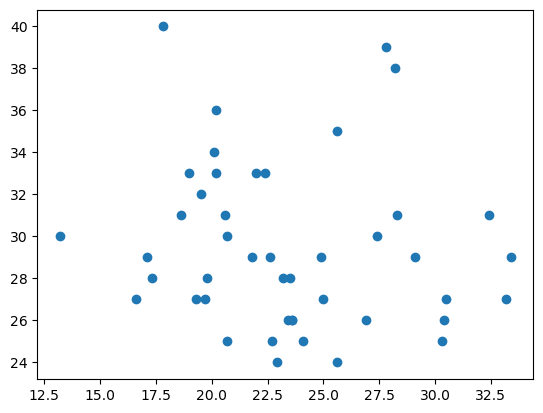

In [31]:
x = df["p_k_percent"]
y = df["player_age"]

plt.scatter(x, y)
plt.show()

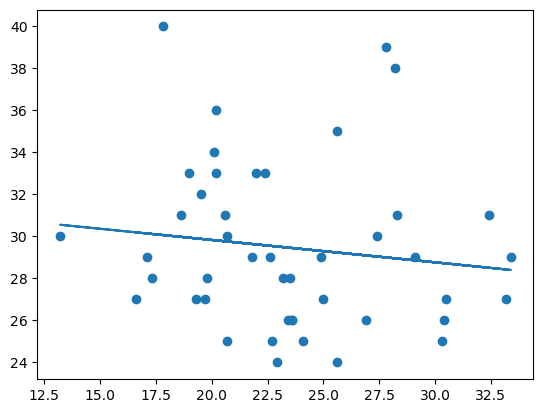

In [42]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

x = df["p_k_percent"]
y = df["player_age"]

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [12]:
df.query('player_age < 27')

,first_name,player_id,year,player_age,p_home_run,p_k_percent,p_bb_percent,batting_avg,p_total_strike,n_ff_formatted,ff_avg_speed,n_sl_formatted,sl_avg_speed,n_ch_formatted,ch_avg_speed,n_cukc_formatted,cu_avg_speed,si_avg_speed,si_avg_spin,n_fc_formatted,fc_avg_speed,n_fs_formatted,fs_avg_speed,n_kn_formatted,kn_avg_speed,n_fastball_formatted,fastball_avg_speed,n_breaking_formatted,breaking_avg_speed,Unnamed: 30
last_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Urias,Julio,628711,2022,25,23,24.1,6.0,0.199,1807,47.7,93.1,NaN,NaN,17.5,86.2,33.3,80.9,93.9,2532.0,NaN,NaN,NaN,NaN,NaN,NaN,49.2,93.1,33.3,80.9,NaN
Lopez,Pablo,641154,2022,26,21,23.6,7.2,0.234,1891,38.8,93.5,NaN,NaN,35.3,87.5,8.1,80.9,93.4,1999.0,9.7,88.7,NaN,NaN,NaN,NaN,56.6,92.7,8.1,80.9,NaN
Alcantara,Sandy,645261,2022,26,16,23.4,5.6,0.212,2231,25.2,98.0,22.0,90.0,27.7,91.8,0.3,86.2,97.8,2293.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,97.9,22.3,89.9,NaN
Cease,Dylan,656302,2022,26,16,30.4,10.4,0.190,1941,39.8,96.8,42.9,87.4,2.4,77.9,13.9,81.1,96.5,2492.0,NaN,NaN,NaN,NaN,NaN,NaN,40.7,96.8,56.8,85.9,NaN
Wright,Kyle,657140,2022,26,19,23.6,7.2,0.232,1797,19.4,95.1,7.2,90.1,15.5,88.1,34.1,84.7,94.4,2260.0,NaN,NaN,NaN,NaN,NaN,NaN,43.3,94.7,41.2,85.7,NaN
Webb,Logan,657277,2022,25,11,20.7,6.2,0.240,1985,3.2,92.4,32.7,82.5,31.2,86.4,NaN,NaN,91.8,1881.0,NaN,NaN,NaN,NaN,NaN,NaN,36.2,91.9,32.7,82.5,NaN
McKenzie,Triston,663474,2022,24,25,25.6,5.9,0.201,1889,55.9,92.5,22.1,87.3,NaN,NaN,21.9,79.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.9,92.5,44.1,83.4,NaN
McClanahan,Shane,663556,2022,25,19,30.3,5.9,0.194,1645,35.7,96.7,15.5,89.3,25.4,87.7,23.4,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.7,96.7,38.9,84.9,NaN
Manoah,Alek,666201,2022,24,16,22.9,6.5,0.202,1942,35.9,93.9,27.1,81.5,11.2,86.5,NaN,NaN,93.3,2194.0,NaN,NaN,NaN,NaN,NaN,NaN,61.7,93.6,27.1,81.5,NaN
